<a href="https://colab.research.google.com/github/monaraghiTamu/Mohammad/blob/main/ML_defectsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)




train_data = pd.read_csv('data (1).csv')


Y_1 = train_data[['DefectSize']].values
Y_2 = train_data[['thickness']].values
Y_3 = train_data[['depth']].values


X_1 = train_data[['FWHM @ t*','Max deltaT', 't_max', 'FWHM @ 2t*', 'FWHM @ 0.5t*', 'Intg @ t*', 'Intg @ 2t*', 'Intg @ 0.5t*', 'DeltaT_ss', 't**' ]].values

X_2 = train_data[['FWHM @ t*','FWHM @ 2t*', 'FWHM @ 0.5t*' ]].values
X_3= train_data[['DeltaT_ss' ]].values
#scaler = StandardScaler()

Saving data (1).csv to data (1) (1).csv
2.4.1


In [ ]:
train_dataset = train_data.sample(frac=0.8, random_state=0)
test_dataset = train_data.drop(train_dataset.index)

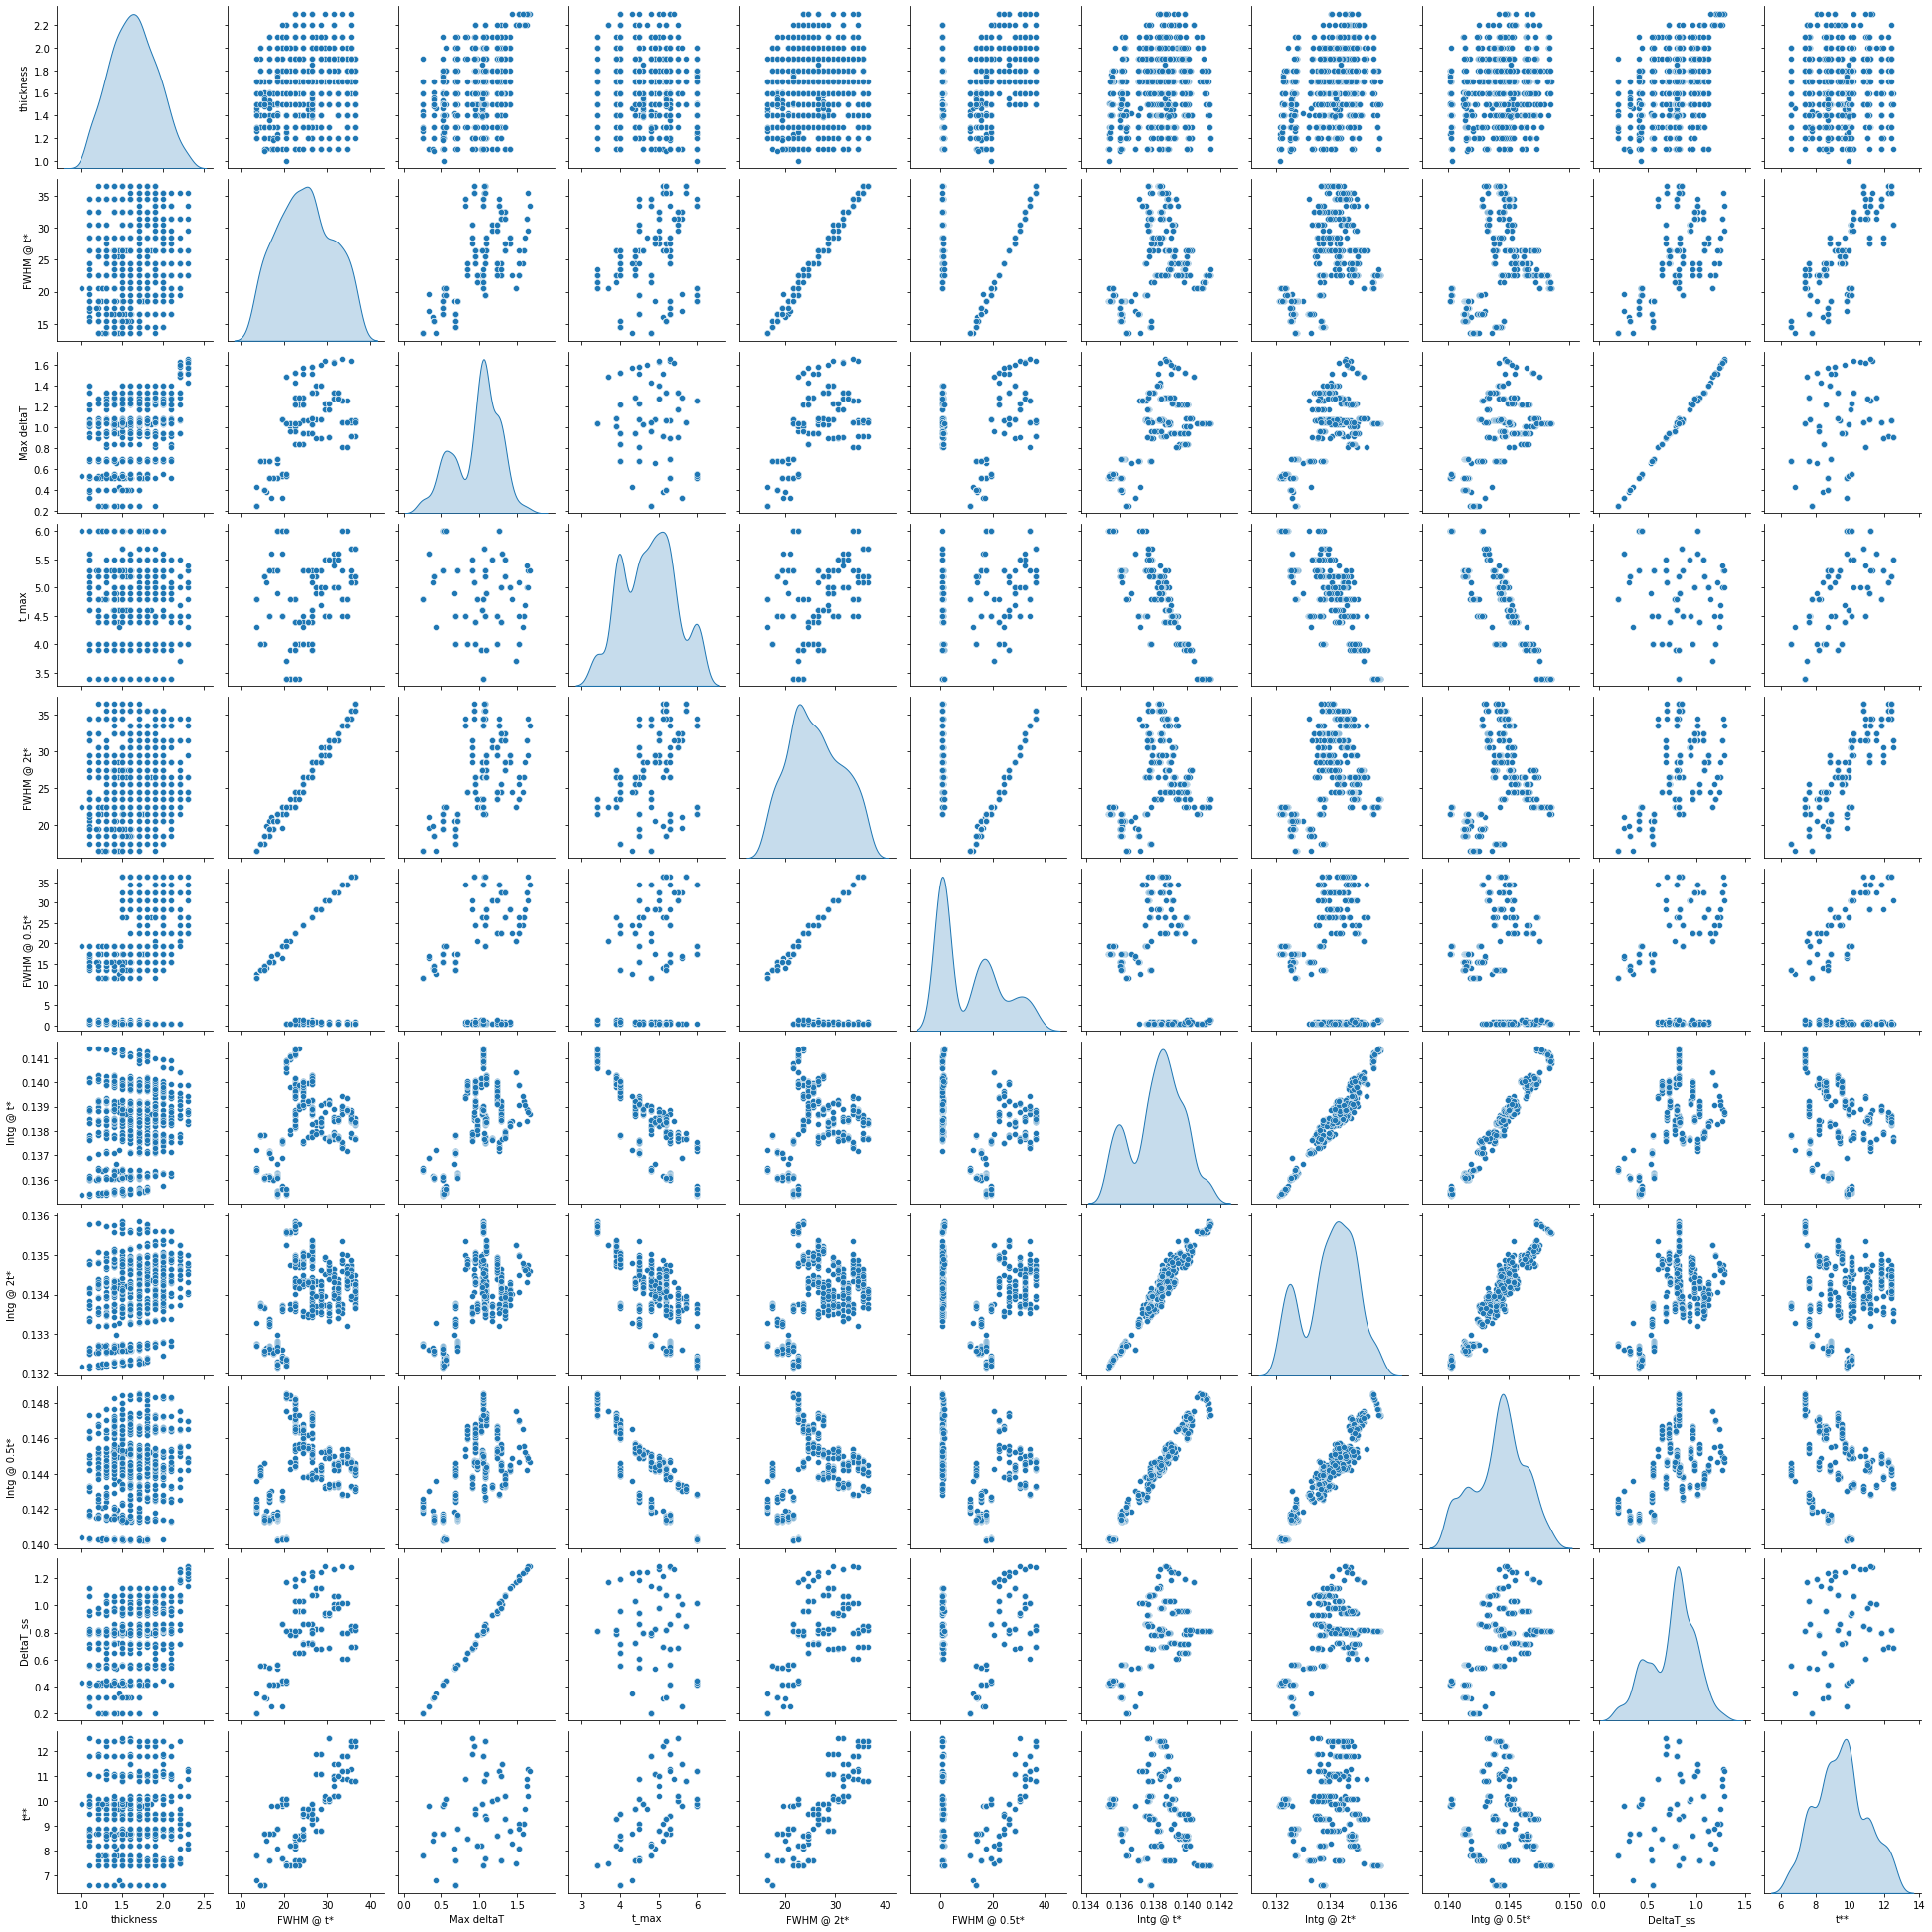

In [ ]:
sns.pairplot(train_dataset[['thickness','FWHM @ t*','Max deltaT', 't_max', 'FWHM @ 2t*', 'FWHM @ 0.5t*', 'Intg @ t*', 'Intg @ 2t*', 'Intg @ 0.5t*', 'DeltaT_ss', 't**' ]], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
depth,744.0,1.726402,0.194314,1.400000,1.600000,1.700000,1.900000,2.100000
DefectSize,744.0,25.525538,7.375664,10.000000,20.000000,26.000000,32.000000,38.000000
thickness,744.0,1.635065,0.280571,1.000000,1.400000,1.600000,1.800000,2.300000
Max deltaT,744.0,0.968827,0.299640,0.252008,0.700449,1.046152,1.227438,1.662201
FWHM @ t*,744.0,24.899331,6.298573,13.500027,20.500038,24.500050,30.500058,36.500074
t_max,744.0,4.755914,0.688723,3.400000,4.000000,4.800000,5.200000,6.000000
FWHM @ 2t*,744.0,25.962507,5.262022,16.500033,22.500042,25.500052,30.500058,36.500074
FWHM @ 0.5t*,744.0,11.401288,11.918428,0.499997,0.500001,11.500023,19.500040,36.500074
Intg @ t*,744.0,0.138244,0.001518,0.135324,0.137507,0.138431,0.139229,0.141393
Intg @ 2t*,744.0,0.133985,0.000945,0.132133,0.133431,0.134157,0.134728,0.135859


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('thickness')
test_labels = test_features.pop('thickness')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
depth,1.726402,0.194314
DefectSize,25.525538,7.375664
thickness,1.635065,0.280571
Max deltaT,0.968827,0.299640
FWHM @ t*,24.899331,6.298573
t_max,4.755914,0.688723
FWHM @ 2t*,25.962507,5.262022
FWHM @ 0.5t*,11.401288,11.918428
Intg @ t*,0.138244,0.001518
Intg @ 2t*,0.133985,0.000945


In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[ 1.7264024  25.525537    0.9688273  24.899332    4.755914   25.962507
 11.401288    0.1382444   0.13398471  0.14424871  0.7556635   9.475268  ]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 1.6  14.    0.68 14.5   4.   17.5  13.5   0.14  0.13  0.14  0.55  6.6 ]]

Normalized: [[-0.65 -1.56 -0.96 -1.65 -1.1  -1.61  0.18 -0.27 -0.25 -0.16 -0.87 -1.98]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 9.91 s, sys: 457 ms, total: 10.4 s
Wall time: 9.67 s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.ylim([0,1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

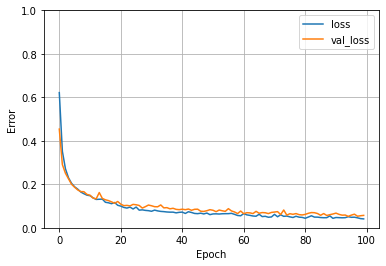

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results[bnn_model]

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

NameError: ignored

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error [Defect size]
tmax_model,7.140057
linear_model,0.251862
dnn_model,0.091330


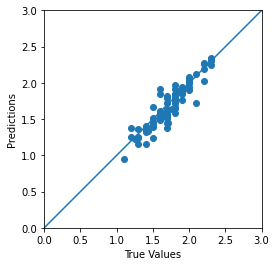

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

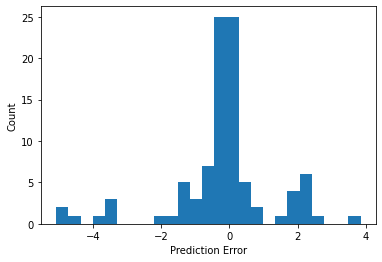

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')